In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
df_canada = pd.read_csv('can_df_clean.csv', index_col='Country')

In [3]:
df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Europe,Southern Europe,Developed regions,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0
Algeria,Africa,Northern Africa,Developing regions,80.0,67.0,71.0,69.0,63.0,44.0,69.0,...,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
Andorra,Europe,Southern Europe,Developed regions,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0


In [4]:
df_canada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, Afghanistan to Zimbabwe
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Continent  195 non-null    object 
 1   Region     195 non-null    object 
 2   DevName    195 non-null    object 
 3   1980       195 non-null    float64
 4   1981       195 non-null    float64
 5   1982       195 non-null    float64
 6   1983       195 non-null    float64
 7   1984       195 non-null    float64
 8   1985       195 non-null    float64
 9   1986       195 non-null    float64
 10  1987       195 non-null    float64
 11  1988       195 non-null    float64
 12  1989       195 non-null    float64
 13  1990       195 non-null    float64
 14  1991       195 non-null    float64
 15  1992       195 non-null    float64
 16  1993       195 non-null    float64
 17  1994       195 non-null    float64
 18  1995       195 non-null    float64
 19  1996       195 non-null    float64
 20  

In [5]:
df_canada.shape

(195, 38)

# Data Visuaization

>## Word Clouds

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

Luckily, a Python package already exists in Python for generating word clouds. The package, called word_cloud was developed by Andreas Mueller. You can learn more about the package by following  [link](https://github.com/amueller/word_cloud/).

Let's use this package to learn how to generate a word cloud for a given text document.

Word clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze a short novel written by Lewis Carroll titled Alice's Adventures in Wonderland. Let's go ahead and download a .txt file of the novel.

In [6]:
script = open('I Have a Dream by Martin Luther King Jr.txt', 'r',encoding='utf-8').read()

In [7]:
stopwords = set(STOPWORDS)

In [8]:
King = np.array(Image.open('download.png'))

In [9]:
wc = WordCloud(background_color='white',mask= King,stopwords=stopwords).generate(script)


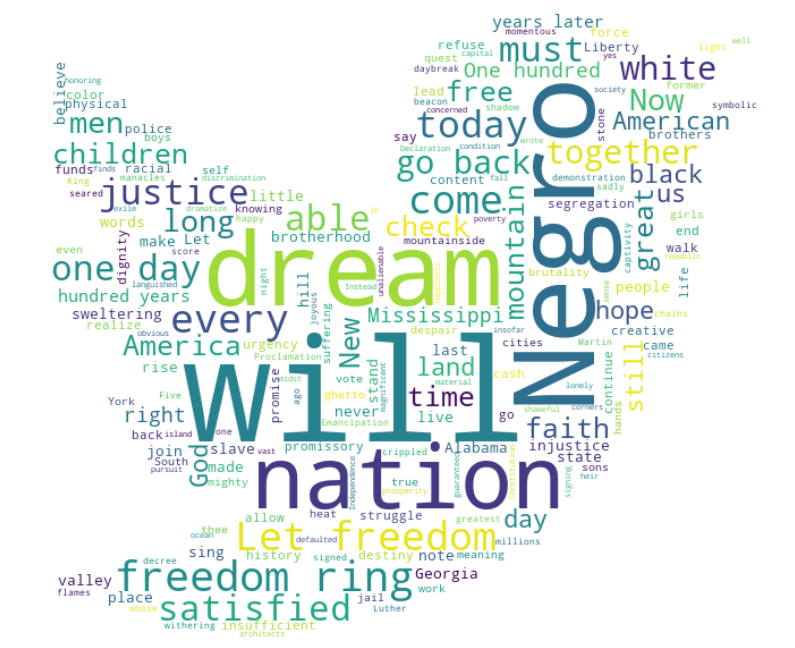

In [10]:
# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig(fname='speech',dpi=300, bbox_inches='tight')
plt.show()

 # WILL DREAM

Unfortunately, our immmigration data does not have any text data, but where there is a will there is a way. Let's generate sample text data from our immigration dataset, say text data of 90 words.

**what was the total immigration from 1980 to 2013?**


In [11]:
total_immigration = df_canada['total'].sum()
total_immigration

6409153.0

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.



In [12]:
max_words = 90
word_string = ''
for country in df_canada.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_canada.loc[country, 'total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

We are not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.


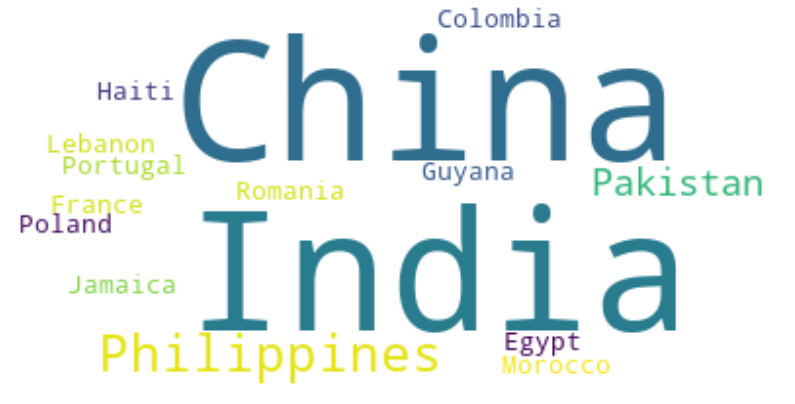

In [13]:
# create the word cloud
wc = WordCloud(background_color='white').generate(word_string)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


**According to the above word cloud, it looks like the majority of the people who immigrated came from one of 15 countries that are displayed by the word cloud.**

# Regression Plots <a id="10"></a>

> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about _seaborn_ by following this [link](https://seaborn.pydata.org?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) and more about _seaborn_ regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


In [14]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_canada.loc[:,'1980':'2013'].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put it back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137.0
1,1981.0,110563.0
2,1982.0,104271.0
3,1983.0,75550.0
4,1984.0,73417.0


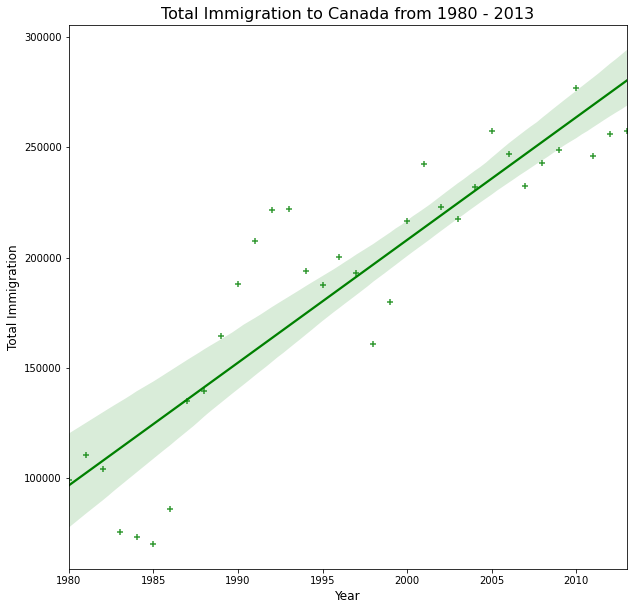

In [15]:
 plt.figure(figsize=(10,10))
sns.regplot(x= 'year',y='total' , data= df_tot, color='green', marker='+')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Immigration', fontsize=12)
plt.title('Total Immigration to Canada from 1980 - 2013', fontsize=16)
plt.show()

**Question: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.**

In [16]:
df = df_canada.loc[['Denmark', 'Sweden', 'Norway'], '1980':'2013'].sum(axis=0).reset_index()
df.columns=['year', 'total']
df.head()

,year,total
0,1980,669.0
1,1981,678.0
2,1982,627.0
3,1983,333.0
4,1984,252.0


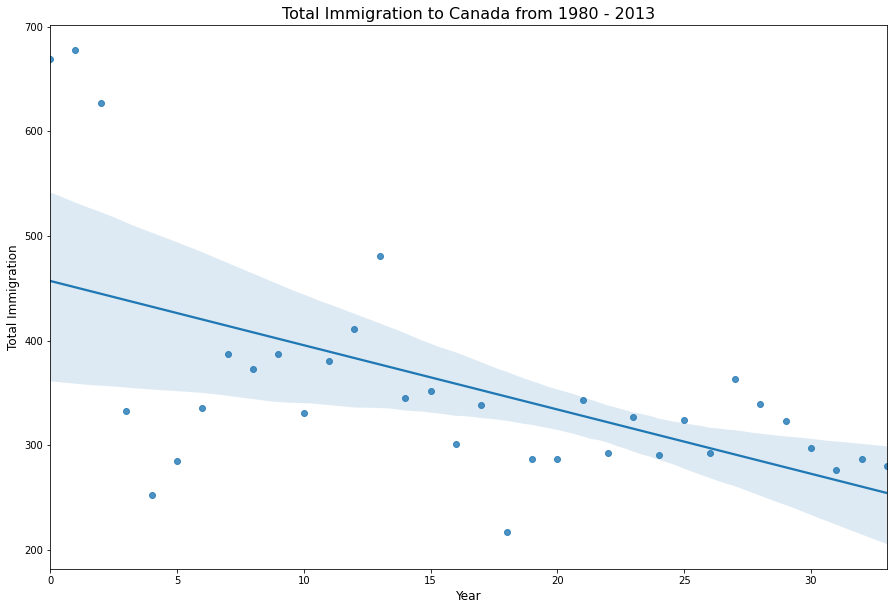

In [17]:
plt.figure(figsize=(15, 10))
sns.regplot(x=df.index.values, y='total', data=df)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Immigration', fontsize=12)
plt.title('Total Immigration to Canada from 1980 - 2013', fontsize=16)
plt.show()